# They Mysterious Island NLTK Project

## Import Module

In [1]:
from collections import Counter
from bs4 import BeautifulSoup
import requests
import nltk

In [4]:
url = "https://www.gutenberg.org/files/1268/1268-h/1268-h.htm"

r = requests.get(url)

# r.encoding = 'utf-8'

html = r.text

print(html[:20000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      The Mysterious Island, by Jules Verne
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
 

In [5]:
url = "https://www.gutenberg.org/files/1268/1268-h/1268-h.htm"

r = requests.get(url)

r.encoding = 'utf-8'

html = r.text

print(html[:20000])

<?xml version="1.0" encoding="utf-8"?>

<!DOCTYPE html
   PUBLIC "-//W3C//DTD XHTML 1.0 Strict//EN"
   "http://www.w3.org/TR/xhtml1/DTD/xhtml1-strict.dtd" >

<html xmlns="http://www.w3.org/1999/xhtml" lang="en">
  <head>
    <title>
      The Mysterious Island, by Jules Verne
    </title>
    <style type="text/css" xml:space="preserve">

    body { margin:5%; background:#faebd0; text-align:justify}
    P { text-indent: 1em; margin-top: .25em; margin-bottom: .25em; }
    H1,H2,H3,H4,H5,H6 { text-align: center; margin-left: 15%; margin-right: 15%; }
    hr  { width: 50%; text-align: center;}
    .foot { margin-left: 20%; margin-right: 20%; text-align: justify; text-indent: -3em; font-size: 90%; }
    blockquote {font-size: 97%; font-style: italic; margin-left: 10%; margin-right: 10%;}
    .mynote    {background-color: #DDE; color: #000; padding: .5em; margin-left: 10%; margin-right: 10%; font-family: sans-serif; font-size: 95%;}
    .toc       { margin-left: 10%; margin-bottom: .75em;}
 

In [6]:
soup = BeautifulSoup(html)

text = soup.text

print(text[:20000])




      The Mysterious Island, by Jules Verne
    





The Project Gutenberg EBook of The Mysterious Island, by Jules Verne





THIS EBOOK WAS ONE OF PROJECT GUTENBERG'S EARLY FILES. THERE IS
AN IMPROVED EDITION OF THIS TITLE WHICH MAY VIEWED AT EBOOK 
[ #8993 ]





This eBook is for the use of anyone anywhere at no cost and with
almost no restrictions whatsoever.  You may copy it, give it away or
re-use it under the terms of the Project Gutenberg License included
with this eBook or online at www.gutenberg.org


Title: The Mysterious Island

Author: Jules Verne

Release Date: August 24, 2008 [EBook #1268]
Last Updated: October 13, 2016

Language: English

Character set encoding: UTF-8

*** START OF THIS PROJECT GUTENBERG EBOOK THE MYSTERIOUS ISLAND ***




Produced by Anthony Matonak, Trevor Carlson, and David Widger






    



      THE MYSTERIOUS ISLAND
    




      by Jules Verne
    




      1874
    

 



 



CONTENTS





 PART 1. DROPPED  FROM THE CLOUDS



 Chapter

In [7]:
tokenizers = nltk.tokenize.RegexpTokenizer('\w+')
tokens = tokenizers.tokenize(text)

In [8]:
print(tokens[:30])

['The', 'Mysterious', 'Island', 'by', 'Jules', 'Verne', 'The', 'Project', 'Gutenberg', 'EBook', 'of', 'The', 'Mysterious', 'Island', 'by', 'Jules', 'Verne', 'THIS', 'EBOOK', 'WAS', 'ONE', 'OF', 'PROJECT', 'GUTENBERG', 'S', 'EARLY', 'FILES', 'THERE', 'IS', 'AN']


In [10]:
words = [token.lower() for token in tokens]

In [11]:
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\asus\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [12]:
stop_words = nltk.corpus.stopwords.words('english')

In [13]:
words_clean = [word for word in words if word not in stop_words]

In [14]:
count = Counter(words_clean)

In [15]:
top_ten = count.most_common(10)

## Visualize it

In [17]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

In [18]:
df = pd.DataFrame(top_ten, columns=['words', 'occurences'])

Text(0.5, 1.0, 'The Mysterious Island Most Common Words')

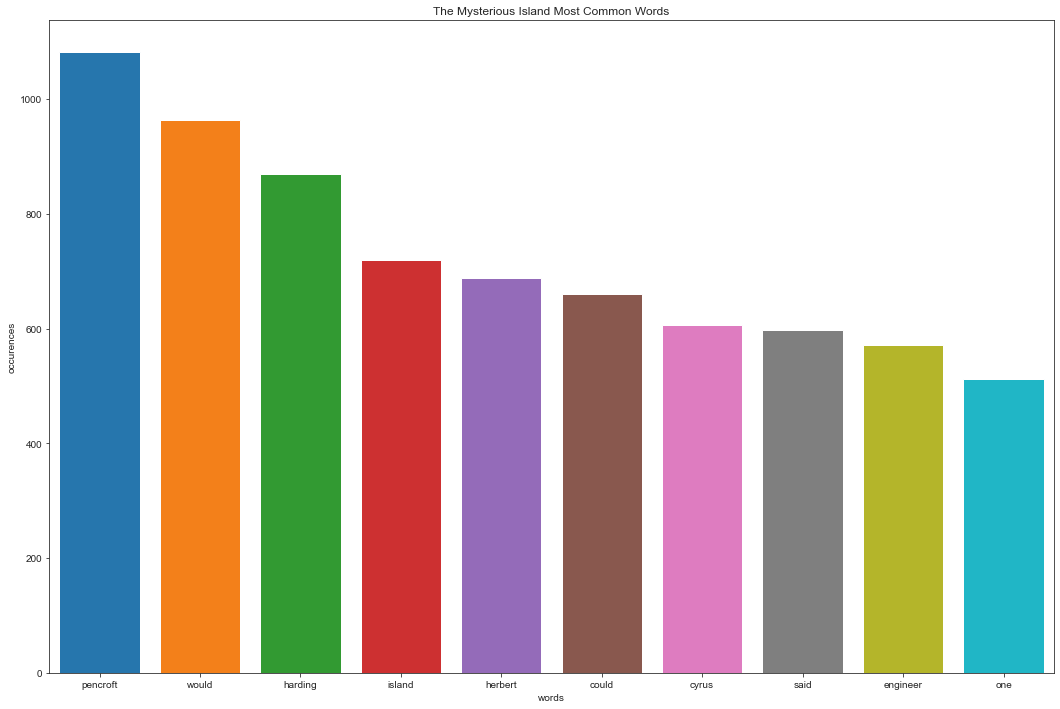

In [20]:
sns.set_style('ticks')
plt.figure(figsize=(18, 12))
sns.barplot(x='words', y='occurences', data=df, saturation=0.9).set_title('The Mysterious Island Most Common Words')

## Build wordcloud

In [30]:
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from PIL import Image
import numpy as np

In [31]:
mask = np.array(Image.open('upvote.png'))

In [34]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='white', colormap='Set2', 
                      collocations=False, stopwords=STOPWORDS, 
                      mask=mask).generate(text)

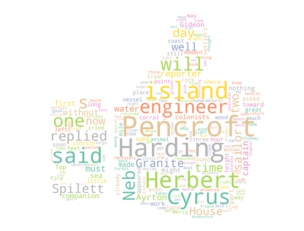

In [35]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [36]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='white', colormap='Set1', 
                      collocations=False, stopwords=STOPWORDS, 
                      mask=mask).generate(text)

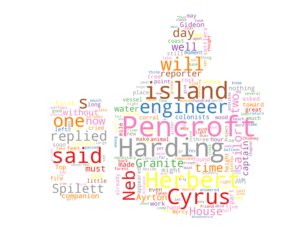

In [37]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [40]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='navy', colormap='rainbow', 
                      collocations=False, stopwords=STOPWORDS, 
                      mask=mask).generate(text)

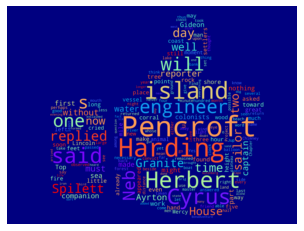

In [41]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

In [42]:
mask2 = np.array(Image.open('book.png'))

In [43]:
wordcloud = WordCloud(width=3000, height=2000, random_state=1, 
                      background_color='white', colormap='Set1', 
                      collocations=False, stopwords=STOPWORDS, 
                      mask=mask2).generate(text)

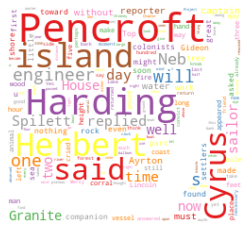

In [44]:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()